# **Astrophysical Computations & Algorithms**
## *TA Week 7*

---
## Annoucement
- 4/23, 4/28 수업 없음. (Mid term 4/22~4/28)
---

## Cubic spline interpolation

$y = Ay_j + By_{j+1} + Cy_j'' + Dy_{j+1}''$ 

$A = \frac{x_{j+1} - x}{x_{j+1} - x_j}, \quad B = \frac{x - x_j}{x_{j+1} - x_j}, \quad C = \frac{1}{6}(A^3 - A)(x_{j+1} - x_j)^2, \quad D = \frac{1}{6}(B^3 - B)(x_{j+1} - x_j)^2$

$\text{We need}\ \  y_j'' \ \ \text{for } j = 0, 1, \ldots, N \rightarrow \text{Need}\ N\ \text{equations to solve}$ 

---

$
(x_{j-1}, x_j) \text{ 와 } (x_j, x_{j+1}) \text{ 구간에서}\  \frac{dy}{dx} \text{ 가 } x = x_j \text{ 에서 일치}
$

$\frac{x_j - x_{j-1}}{6}y_{j-1}'' + \frac{x_{j+1} - x_{j-1}}{3}y_j'' + \frac{x_{j+1} - x_j}{6}y_{j+1}'' = \frac{y_{j+1} - y_j}{x_{j+1} - x_j} - \frac{y_j - y_{j-1}}{x_j - x_{j-1}}\ \ \ (\text{for } j = 2, \ldots, N-1) \rightarrow (N-2)\ \text{equations} $

$\text{Set}$ $y_1''=y_N''=0$ ($\text{Natural Spline}$)

$\text{Now we have}\ N-2\ \text{equations and unknown}\ y''s$

---

$\text{Represent with matrix}$

$$
\begin{bmatrix}
1 & 0 & 0 & \cdots & 0 & 0 \\
\frac{x_2-x_1}{6} & \frac{x_3-x_1}{3} & \frac{x_3-x_2}{6} & \cdots & 0 & 0 \\
0 & \frac{x_3-x_2}{6} & \frac{x_4-x_2}{3} & \frac{x_4-x_3}{6} & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \cdots & \frac{x_{N-1}-x_{N-2}}{6} & \frac{x_N-x_{N-2}}{3} & \frac{x_N-x_{N-1}}{6} \\
0 & 0 & 0 & \cdots & 0 & 1
\end{bmatrix}
\begin{bmatrix}
y_1'' \\
y_2'' \\
y_3'' \\
\vdots \\
y_{N-1}'' \\
y_N''
\end{bmatrix}
=
\begin{bmatrix}
0 \\
\frac{y_3-y_2}{x_3-x_2} - \frac{y_2-y_1}{x_2-x_1} \\
\frac{y_4-y_3}{x_4-x_3} - \frac{y_3-y_2}{x_3-x_2} \\
\vdots \\
\frac{y_N-y_{N-1}}{x_N-x_{N-1}} - \frac{y_{N-1}-y_{N-2}}{x_{N-1}-x_{N-2}} \\
0
\end{bmatrix}
$$

Let $h_j = x_{j+1} - x_j$ to simplify:

$$
\begin{bmatrix}
1 & 0 & 0 & \cdots & 0 & 0 \\
\frac{h_1}{6} & \frac{h_1+h_2}{3} & \frac{h_2}{6} & \cdots & 0 & 0 \\
0 & \frac{h_2}{6} & \frac{h_2+h_3}{3} & \frac{h_3}{6} & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \cdots & \frac{h_{N-2}}{6} & \frac{h_{N-2}+h_{N-1}}{3} & \frac{h_{N-1}}{6} \\
0 & 0 & 0 & \cdots & 0 & 1
\end{bmatrix}
\begin{bmatrix}
y_1'' \\
y_2'' \\
y_3'' \\
\vdots \\
y_{N-1}'' \\
y_N''
\end{bmatrix}
=
\begin{bmatrix}
0 \\
\frac{y_3-y_2}{h_2} - \frac{y_2-y_1}{h_1} \\
\frac{y_4-y_3}{h_3} - \frac{y_3-y_2}{h_2} \\
\vdots \\
\frac{y_N-y_{N-1}}{h_{N-1}} - \frac{y_{N-1}-y_{N-2}}{h_{N-2}} \\
0
\end{bmatrix}
$$


---

### How to solve $Ax=b$ with NumPy?

#### `np.linalg.solve()`

In [53]:
A = np.array([[2, 5], [1, 4]])
b = np.array([12, 9])

# Ax = b 풀기
x = np.linalg.solve(A, b)

print("Solution x:", x)

Solution x: [1. 2.]


#### $x=A^{-1}b$

In [54]:
A_inv = np.linalg.inv(A)
x = np.dot(A_inv, b)
print("Solution x:", x)

# or
print("Solution x:", np.linalg.inv(A).dot(b))

Solution x: [1. 2.]
Solution x: [1. 2.]


## HW11
<img src='HW11.png' width='600'>

In [55]:
import numpy as np

### `np.linspace()`

In [56]:
## [0,20] 4등분
np.linspace(0,20,5)

array([ 0.,  5., 10., 15., 20.])

### `np.sin(), np.cos()`
*You need to input radians (not degrees!).*

In [57]:
print(np.sin(0))

0.0


In [58]:
print(np.sin(np.pi/2))

1.0


In [59]:
print(np.sin(np.pi*2))

-2.4492935982947064e-16


In [60]:
print(np.sin(np.deg2rad(90)))

1.0


### *효과적인 결과 표현*
### `matplotlib tip : linestyle`

1. Solid :
   - `linestyle='solid'` or `'-'`

2. Dashed :
   - `linestyle='dashed'` or `'--'`

3. Dotted :
   - `linestyle='dotted'` or `':'`

4. Dash-dot :
   - `linestyle='dashdot'` or `'-.'`

In [61]:
import matplotlib.pyplot as plt

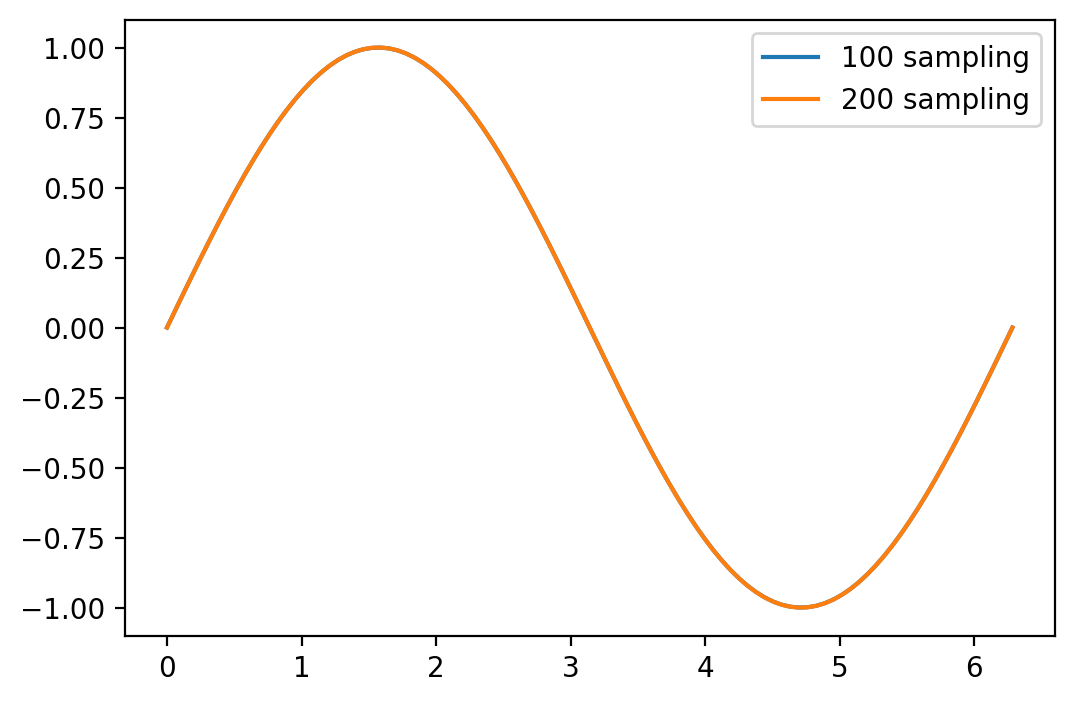

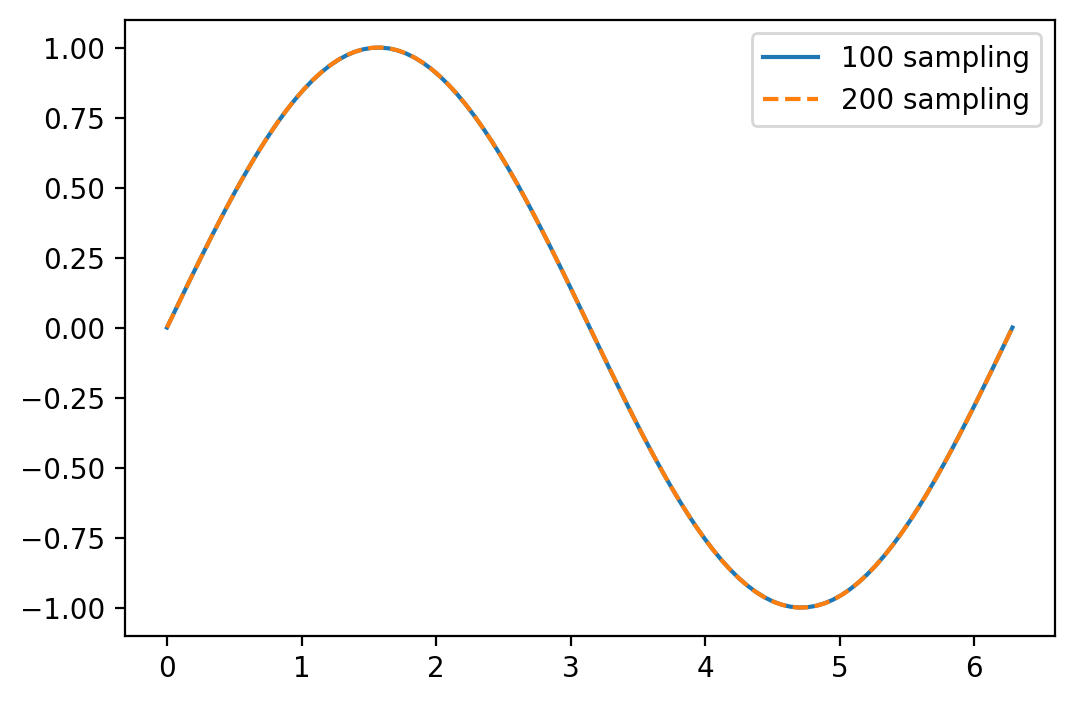

In [62]:
t1 = np.linspace(0,2*np.pi,100)
t2 = np.linspace(0,2*np.pi,200)
plt.figure(figsize=(6,4), dpi=200)
plt.plot(t1, np.sin(t1), label='100 sampling')
plt.plot(t2, np.sin(t2), label='200 sampling')
plt.legend()
plt.show()

plt.figure(figsize=(6,4), dpi=200)
plt.plot(t1, np.sin(t1), label='100 sampling')
plt.plot(t2, np.sin(t2), linestyle='--', label='200 sampling')
plt.legend()
plt.show()

추가로 linewidth, alpha, marker, markersize 등을 조절해 시각적으로 효과적인 표현이 가능하다

---

## HW12
<img src='HW12.png' width='600'>

$f(t) = \sum_{n=1,3,5,\dots}^{\infty} \frac{4}{n\pi} \sin(n t)$ 증명은 직접 수식을 전개.

가능한 Powerpoint, Word 수식입력기 활용

Term 의 갯수를 증가시키면서 원래 함수에 접근해 가는 것은 Lecture note example처럼 visualization 권장

<img src='expansion_ex.png' width='400'>

---